In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
from sklearn.metrics import roc_auc_score

In [4]:
raw = pd.read_csv('../jsons/very_clean_data.csv')

The second model that I will be fitting is a Random Forest. A Random Forest is composed of a specified number of decision trees that are constructed when the model is trained. Observations are classified based on which class is selected most frequently by the trees.

Although Random Forests can be very effective for both regression and classification problems, it is highly computationally taxing. Therefore, the dimensionality of the testing set will need to be reduced, compared to what can be handled by a Logistic Regression or Naive Bayes model.

Before the fitting step can occur, I have to transform the data into a format that can be understood by the model.

I will be using the TFIDF Vectorizer for this model, which transforms the dataset into a vector containing individual words as columns, with their "Inverse Document Frequency" as the values pertaining to each word/column.

According to the SKLearn documentation, the TFIDF Vectorizer is equivalent to running CountVectorizer, followed by TFIDFTransformer.

In [5]:
tfidf = TfidfVectorizer(stop_words='english', min_df=3, max_df=1.0,max_features=12000, ngram_range=(1,4))

In [6]:
X = raw['text']
y = raw['target']

In [7]:
X = tfidf.fit_transform(X)

In [8]:
X = pd.SparseDataFrame(X, columns=tfidf.get_feature_names())
X.fillna(0,inplace=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

I will be 'verbose=2' and 'n_jobs=-1', to aid in modeling a random forest. The former hyperparameter is used to gradually print information about the status of the "tree building" process. Since a Random Forest can take so long to fit, this setting keeps the user informed on its processing status (without it, it can be ambiguous as to whether the model is still running, or whether the notebook has frozen).

'n_jobs=-1' also helps to fit the Random Forest more quickly, as it devotes all computational resources toward this task.

'max_features' has been set to 'sqrt', to reduce the dimensionality of the training set. This appears to be a common practice, based on other text analyses which use a Random Forest classifier.

In [10]:
rfc = RandomForestClassifier(n_estimators=200, max_features='sqrt',verbose=2,n_jobs=-1)
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200building tree 4 of 200

building tree 5 of 200building tree 6 of 200

building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min


building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.7min


building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 13.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

In [11]:
rfc_predict = rfc.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    4.8s finished


In [12]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=5, scoring='precision')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 14.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 14.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | e

## Confusion Matrix



Classification results are frequently displayed via a _confusion matrix_, which lists the True Positives, True Negatives, False Positives and False Negatives 

![Confusion Matrix Diagram](../images/confusionmatrix.jpg)

For this use case, we will be looking to maximize the values in the bottom right corner (True Positives), while limiting the results of the top right corner (False Positives).

In [14]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All Accuracy Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score - Logistic Regression: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[  666  5036]
 [  465 15028]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.59      0.12      0.19      5702
           1       0.75      0.97      0.85     15493

   micro avg       0.74      0.74      0.74     21195
   macro avg       0.67      0.54      0.52     21195
weighted avg       0.71      0.74      0.67     21195



=== All Accuracy Scores ===
[0.74025419 0.74309939 0.74040604 0.74400199 0.74388336]


=== Mean Accuracy Score ===
Mean Accuracy Score - Logistic Regression:  0.7423289951458184


The model's precision score is right around the percentage of observations labeled as the positive class, which is not a good sign as it just means that the model is picking the positive class.

What about if different confidence threshold levels were used to designate a positive class?

In [16]:
rfc_probas = rfc.predict_proba(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    5.1s finished


### With the thresholds applied

In [17]:
pred_proba_df = pd.DataFrame(rfc_probas)

In [50]:
precision_scores = []
accuracy_scores = []
auc_roc_scores = []
avg_precision_scores = []
recall_scores = []
true_poses = []
false_poses = []

In [51]:
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]

for i in threshold_list:
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    
    first_part = y_test.as_matrix().reshape(y_test.as_matrix().size,1);
    second_part = y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1);
    
    prec_score = precision_score(first_part, second_part)
    precision_scores.append(prec_score)
    pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    acc_score = accuracy_score(first_part,second_part)
    accuracy_scores.append(acc_score)
    
    aucroc_score = roc_auc_score(first_part,second_part)
    auc_roc_scores.append(aucroc_score)
    
    avg_prec_score = average_precision_score(first_part,second_part)
    avg_precision_scores.append(avg_prec_score)
    
    rec_score = recall_score(first_part,second_part)
    recall_scores.append(rec_score)
    
    true_pos = confusion_matrix(first_part,second_part)[1][1]
    true_poses.append(true_pos)
    
    false_pos = confusion_matrix(first_part,second_part)[0][1]
    false_poses.append(false_pos)

C:\Users\16313\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\16313\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\16313\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\16313\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\16313\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\16313\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sy

In [52]:
all_scores = {'thresholds': threshold_list, 
        'precision_scores': precision_scores, 
        'accuracy_scores': accuracy_scores,
       'auc_roc_scores': auc_roc_scores,
       'avg_precision_scores': avg_precision_scores,
             'recall_scores': recall_scores,
             'true_positives': true_poses,
             'false_positives': false_poses}

In [53]:
all_scores = pd.DataFrame(all_scores)

In [54]:
all_scores.sort_values('precision_scores',ascending=False).head()

,thresholds,precision_scores,accuracy_scores,auc_roc_scores,avg_precision_scores,recall_scores,true_positives,false_positives
19,0.99,0.937500,0.272328,0.501982,0.731974,0.004841,75,5
17,0.90,0.902296,0.346733,0.542070,0.751398,0.119215,1847,200
16,0.85,0.883212,0.496910,0.615091,0.785667,0.359259,5566,736
18,0.95,0.880137,0.279500,0.505225,0.733449,0.016588,257,35
15,0.80,0.844587,0.618636,0.646540,0.797567,0.586136,9081,1671


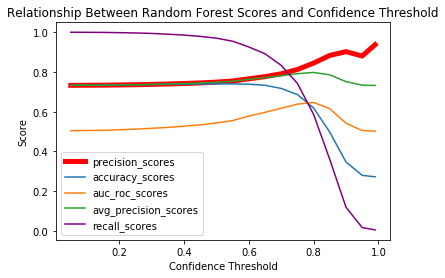

In [39]:
plt.plot('thresholds', 'precision_scores', data=all_scores, marker='', markerfacecolor='blue', markersize=10, color='red', linewidth=5)
plt.plot('thresholds', 'accuracy_scores', data=all_scores)
plt.plot('thresholds', 'auc_roc_scores', data=all_scores)
plt.plot('thresholds', 'avg_precision_scores', data=all_scores)
plt.plot('thresholds', 'recall_scores', data=all_scores,color='purple')
plt.title('Relationship Between Random Forest Scores and Confidence Threshold')
plt.xlabel('Confidence Threshold')
plt.ylabel('Score')

plt.legend()

Unlike the Logistic Regression model (which saw a consistent increase in precision across the threshold levels), the precision score appears to stay at the naive baseline level until it passes .5. This likely means that the Random Forest is exploiting the class inbalanced, and will likely be highly biased.

Let's see how the scores change when the classification threshold is moved to .85.

In [23]:
y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>.85 else 0)
test_accuracy = accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
print('Our testing accuracy is {}'.format(test_accuracy))
print('\n')
print('Confusion Matrix:')
print('\n')
print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))
print('\n')
print(classification_report(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))

Our testing accuracy is 0.4969096485020052


Confusion Matrix:


[[4966  736]
 [9927 5566]]


              precision    recall  f1-score   support

           0       0.33      0.87      0.48      5702
           1       0.88      0.36      0.51     15493

   micro avg       0.50      0.50      0.50     21195
   macro avg       0.61      0.62      0.50     21195
weighted avg       0.74      0.50      0.50     21195



C:\Users\16313\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\16313\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\16313\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\16313\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\16313\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\16313\Anaconda3\lib\

Precision has risen to .88, which is not quite as good as the Linear Regression model. It did select more True Positives than the LR model did, at this threshold percentage (1733 True Positives for LR).

In [55]:
pred_probas = pd.DataFrame(rfc_probas)
y_test_labels = pd.DataFrame(y_test).reset_index()
preds_merged = pd.concat([pred_probas,y_test_labels],axis=1).set_index('index')
preds_with_orig = pd.concat([preds_merged,raw],axis=1)
preds_with_orig = preds_with_orig.dropna()
preds_with_orig.reset_index(inplace=True)
preds_with_orig.columns = ['label','RF_0','RF_1','target','target2','text']

In [56]:
preds_with_orig.head()

,label,RF_0,RF_1,target,target2,text
0,2,0.000000,1.000000,1.0,1,Be Fun Fancy Free sort comment new thread Fun ...
1,8,0.136667,0.863333,1.0,1,As far I'm concerned Guillermo del Toro constr...
2,10,0.124167,0.875833,1.0,1,I writing essay I can't find word something lo...
3,14,0.252500,0.747500,1.0,1,Video Form Ah scary movie There something make...
4,15,0.005000,0.995000,1.0,1,Please use discus week's latest release We're ...


Saving Prediction Probabilities to compare later with other models.

In [57]:
preds_with_orig[['label','RF_0','RF_1','target']].to_csv('../jsons/RF_probas.csv',index=False)

In [58]:
all_scores.to_csv('../jsons/RF_scores.csv')

### Most important features

In [59]:
rfc.feature_importances_

array([4.56933946e-06, 2.68842896e-05, 2.64631065e-05, ...,
       2.97165617e-05, 1.65971444e-05, 1.78135371e-05])

Create a dataframe of the most important Random Forest features.

Code inspired by: https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances

In [63]:
feats = {} # a dict of feature names
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance # add the appropriate value

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

In [66]:
importances.sort_values('Gini-importance',ascending=False).head()

,Gini-importance
film,0.009576
movie,0.006479
think,0.005120
like,0.003929
good,0.003085


These top features seem very similar to the "weighted top words" for TrueFilm, which was discovered in EDA. This is a positive sign in terms of the model having domain relevance.